networkx - популярная библиотека для рисования и анализа графов.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product
import numpy as np

# Пример: рисование генеалогического дерева

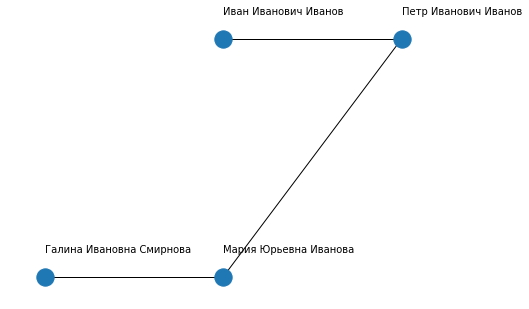

In [2]:
family = {0: 'Иван Иванович Иванов',
          1: 'Мария Юрьевна Иванова',
          2: 'Петр Иванович Иванов',
          3: 'Галина Ивановна Смирнова'}

relations = [(0,2),(1,2),(3,1)]

position = {3:[0,0], 1:[1,0], 0:[1,1], 2:[2,1]}

g = nx.Graph()

g.add_nodes_from(list(family.keys()))
g.add_edges_from(relations)

nx.draw(g, pos=position)

for i, name in family.items():
    plt.text(position[i][0], position[i][1]+0.1, name)

В дереве есть теща (Г.И.Смирнова), супруги Ивановы и сын Петр. Ребро означает отношение "родитель-потомок".

Этот граф можно представить матрицей смежности, в которой будет 1 при отношении "родитель-потомок" и 0 в противоположном случае. Строки и столбцы это вершины графа.

In [3]:
m = np.array([[0,0,1,0],[0,0,1,0],[0,0,0,0],[0,1,0,0]])
m

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0]])

Задачи: 

1. Обогатить граф (увеличить количество узлов до 15)

2. Написать алгоритм, который находит
- все пары "бабушка или дедушка"-"внук или внучка"
- всех прадедушек и прабабушек
- все пары "зять-теща"
- бездетные пары

# Разные примеры networkx

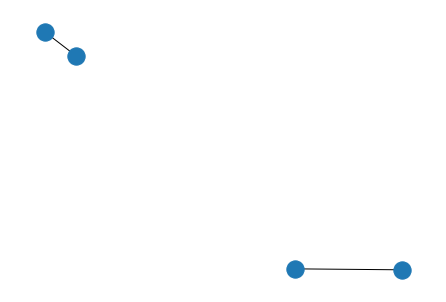

In [4]:
g = nx.Graph()
g.add_nodes_from([(1, {'color':'red'}),(2),(3),(4)])
g.add_edges_from([(1,2),(3,4)])
nx.draw(g)

plt.show()

In [5]:
g.nodes()

NodeView((1, 2, 3, 4))

In [6]:
g.number_of_edges()

2

In [7]:
g.number_of_nodes()

4

In [8]:
g.edges

EdgeView([(1, 2), (3, 4)])

In [9]:
g.nodes

NodeView((1, 2, 3, 4))

In [10]:
g.adj

AdjacencyView({1: {2: {}}, 2: {1: {}}, 3: {4: {}}, 4: {3: {}}})

In [11]:
g.degree

DegreeView({1: 1, 2: 1, 3: 1, 4: 1})

In [12]:
g1 = nx.DiGraph()

In [13]:
g1.add_edge(1,2)
g1.add_edge(2,3)

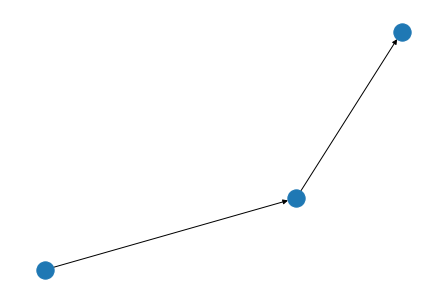

In [14]:
nx.draw(g1)

In [15]:
g = nx.Graph()

In [16]:
g.add_nodes_from([1,2,3])

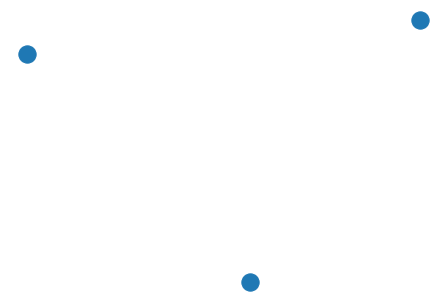

In [17]:
nx.draw(g)

In [18]:
pos = nx.spring_layout(g, seed=200)
pos

{1: array([0.96892377, 0.22253178]),
 2: array([-0.73075185,  0.77746822]),
 3: array([-0.23817192, -1.        ])}

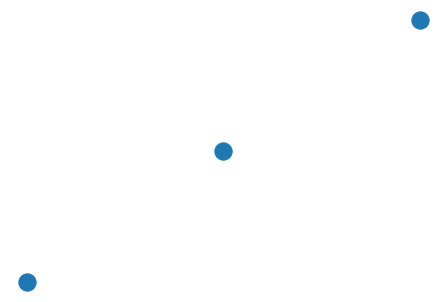

In [19]:
nx.draw(g, pos={1:(1,1), 2:(2,2), 3:(3,3)})

In [20]:
g1 = nx.Graph()

places = dict()

input_layer = range(5)
for i, item_ in enumerate(input_layer):
    places[item_] = [0,i]

hidden_layer = range(5,10)
for i, item_ in enumerate(hidden_layer):
    places[item_] = [1,i]

output_layer = range(10,12)
for i, item_ in enumerate(output_layer):
    places[item_] = [2,i]

for edge_ in product(input_layer, hidden_layer):
    g1.add_edge(*edge_)

for edge_ in product(hidden_layer, output_layer):
    g1.add_edge(*edge_)

    

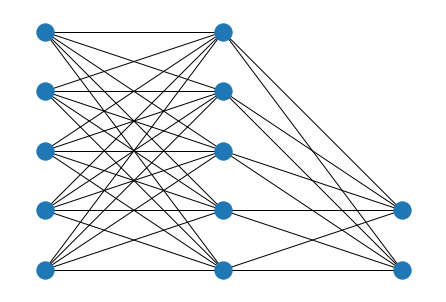

In [21]:
nx.draw(g1, pos=places, )

In [22]:
g2 = nx.MultiDiGraph()

In [23]:
g2.add_edges_from([(1,2),(2,1)])

[0, 0]

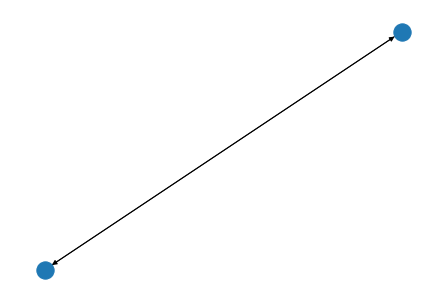

In [24]:
nx.draw(g2)

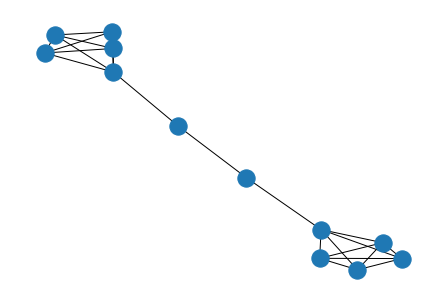

In [25]:
g3 = nx.barbell_graph(5,2)
nx.draw(g3)

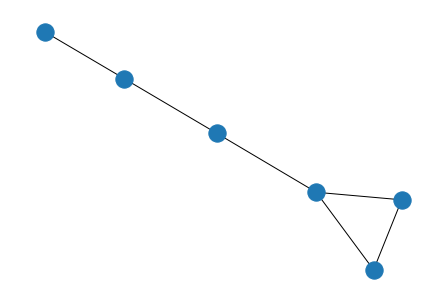

In [26]:
nx.draw(nx.lollipop_graph(3,3))

In [27]:
red = nx.random_lobster(10, 0.9, 0.9)

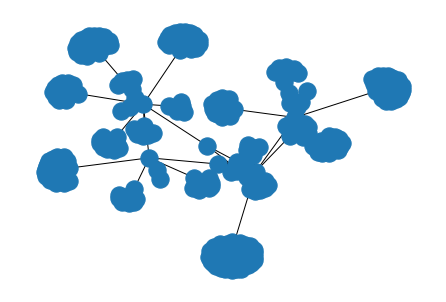

In [28]:
nx.draw(red)

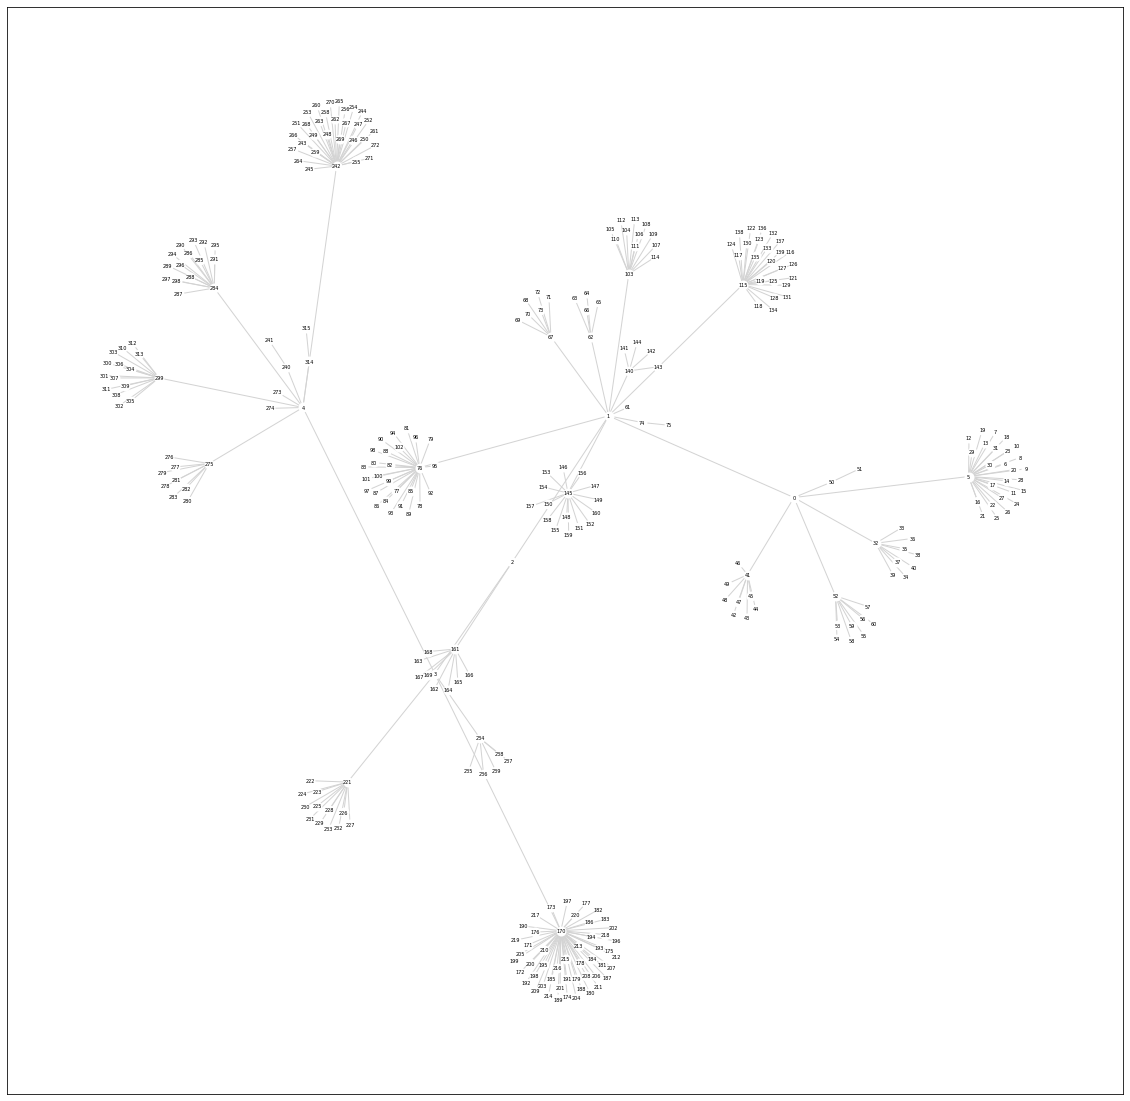

In [37]:
plt.figure(figsize=[20,20])

pos = nx.spring_layout(red, scale = 10)
nx.draw_networkx_nodes(red, pos, node_color = "white", linewidths = 0, node_size = 100)
nx.draw_networkx_labels(red, pos, font_size = 5)
nx.draw_networkx_edges(red, pos, edge_color = 'lightgrey')

plt.show()